In [1]:
flex_title = "Yolov5 Face detection"
flex_subtitle = ""
flex_source_link = "https://github.com/emingenc/yolov5-face/blob/master/face_detect.ipynb"

In [2]:
import ipywidgets as widgets
import IPython.display as display
import os
import torch
from detect_face import *
from PIL import Image

from ipywidgets import VBox

In [3]:
upload = widgets.FileUpload(
    accept='image/*',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple= False
)
btn_run = widgets.Button(description='Detect')
label_detect = widgets.Label()
input_pl = widgets.Output()
input_pl.clear_output()
out_pl = widgets.Output()
out_pl.clear_output()

In [4]:
def on_click_detect(change):

    img = upload.data
    image_show = widgets.Image(value=img[-1], format='png', width=300, height=400)
    image_name = list(upload.value.keys())[-1]
    input_pl.clear_output()
    with input_pl: display.display(image_show)
    try:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = load_model('yolov5n-0.5.pt', device)
        res_img = detect_one(model=model, device=device , img_data = upload.data[-1])
        res_img = Image.fromarray(res_img, 'RGB')
        
        out_pl.clear_output()
        with out_pl: display.display(res_img)
        label_detect.value='Face Detected'
    except:
        pass


btn_run.on_click(on_click_detect)

#### Displaying the GUI

## Sidebar

In [5]:
lbl1 = widgets.Label("Controls")
lbl2 = widgets.Label("Year")

In [6]:
layout = widgets.Layout(
    display='flex',
    flex_flow='column',
    justify_content='space-between',
    height= '350',
    margin='15'
)
VBox([widgets.Label('Select your image!'),
      upload, btn_run, input_pl],layout=layout)

Fusing layers... 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


img.shape:  torch.Size([1, 3, 1408, 2048])
orgimg.shape:  (483, 724, 3)


## App

In [7]:
out_pl

Output()

Fusing layers... 
img.shape:  torch.Size([1, 3, 1408, 2048])
orgimg.shape:  (483, 724, 3)


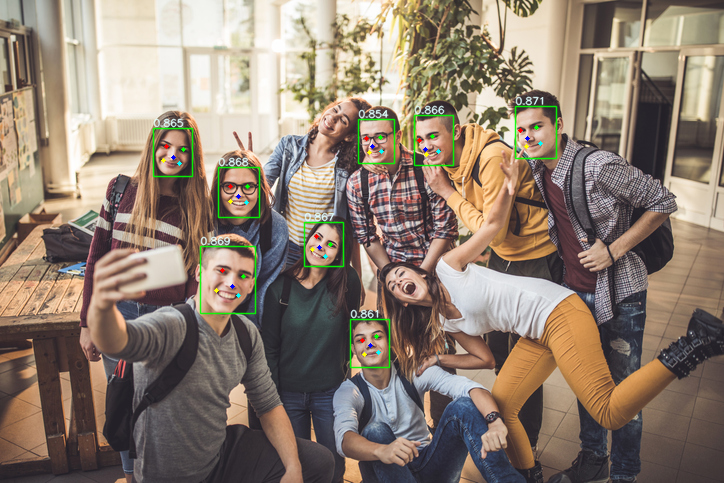

<class 'PIL.Image.Image'>
